In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random
from tabulate import tabulate

In [2]:
%run -i ./Classes.ipynb

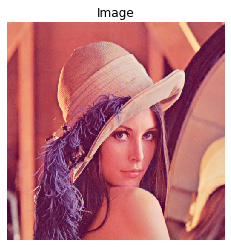

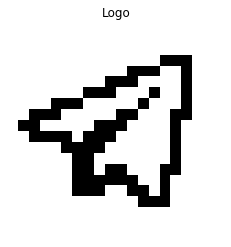

In [3]:
# Load
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 512
logo_size = 20

# Initialize
my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show1(my_image.image, 'Image', 4)
ImageUtil.show1(my_logo.logo, 'Logo', 4)

In [4]:
g = 20
d = 0.5
step = 48

table_headers = ['N', 'G', 'P', 'D', 'PSNR', 'BER']

In [5]:
def test_tr(image, logo, image_size):
    
    # Initialize
    test_image = Image(image, image_size)
    test_logo = Logo(logo, g)

    # Create Watermarker
    temp_riw = RIW(image_size, g, 2 * g, d, step)

    # Embed
    img_y_watermarked = temp_riw.embed(test_image.get_y(), test_logo.logo)
    watermarked_image = Image.copy(test_image)
    watermarked_image.set_y(img_y_watermarked)

    # Calculate PSNR
    psnr = ImageUtil.psnr(test_image.image, watermarked_image.image)
        
    test_tr = []
    for tr in [0, 1, 2, 3, 4]:

        # Attack
        attacked_image = Image(Attacker.attackTranslateByPixel(watermarked_image.image, tr, tr), image_size)

        # Extract
        logo_extracted = temp_riw.extract(attacked_image.get_y())

        # Calculate BER
        ber = ImageUtil.ber(test_logo.logo, logo_extracted)

        test_tr.append((image_size, g, 2 * g, d, psnr, ber))

    print(tabulate(test_tr, headers=table_headers))

In [7]:
test_tr(ori_img, ori_logo, 128)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR    BER
---  ---  ---  ---  -------  -----
128   20   40  0.5  31.9043  0
128   20   40  0.5  31.9043  0.35
128   20   40  0.5  31.9043  0.385
128   20   40  0.5  31.9043  0.315
128   20   40  0.5  31.9043  0.32


In [8]:
test_tr(ori_img, ori_logo, 256)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR     BER
---  ---  ---  ---  -------  ------
256   20   40  0.5  31.9347  0
256   20   40  0.5  31.9347  0.22
256   20   40  0.5  31.9347  0.3175
256   20   40  0.5  31.9347  0.3125
256   20   40  0.5  31.9347  0.3675


In [9]:
test_tr(ori_img, ori_logo, 512)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR     BER
---  ---  ---  ---  -------  ------
512   20   40  0.5  31.9747  0
512   20   40  0.5  31.9747  0.065
512   20   40  0.5  31.9747  0.2075
512   20   40  0.5  31.9747  0.3
512   20   40  0.5  31.9747  0.33


In [10]:
step = 96
test_tr(ori_img, ori_logo, 1024)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

   N    G    P    D     PSNR     BER
----  ---  ---  ---  -------  ------
1024   20   40  0.5  31.9356  0
1024   20   40  0.5  31.9356  0.0025
1024   20   40  0.5  31.9356  0.06
1024   20   40  0.5  31.9356  0.14
1024   20   40  0.5  31.9356  0.2125
